<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#upsample" data-toc-modified-id="upsample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>upsample</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#downsample" data-toc-modified-id="downsample-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>downsample</a></span><ul class="toc-item"><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#upsampled" data-toc-modified-id="upsampled-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>upsampled</a></span></li><li><span><a href="#downsampled" data-toc-modified-id="downsampled-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>downsampled</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

Подключим библиотеки, необходимые для проведения исследования и тестирования обученной модели.

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle

Загружаем файл с данными.

In [2]:
try:
    df = pd.read_csv('/datasets/Churn.csv')
    print('Файл загружен')
except:
    print('Файл не найден')

Файл загружен


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

Выведем первые 10 строк датафрейма и суммарную информацию о нем.

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


В предоставленных данных наблюдаем пропуски в столбце Tenure(информация о том сколько лет человек является клиентом банка), это довольно важный параметр, определяющий лояльность клиента, и достоверно заполнить пропуски в столбце нет возможности, по этому из дальнейшего исследования исключим записи с пропусками.

Столбец RowNumber дублирует информацию о номере строки, соответственно не несет полезной информации в себе, а значит его можно убрать из набора признаков. Столбцы CustomerId и Surname так же можно исключить из набора признаков, т.к. несут больше системную фунцкцию по интерпретации клиента и его связи с банком, а нам в исследовании интересны именно банковские данные, без привязки к личности.

Столбцы Geography, Gender имеют не подходящий тип данных для машинного обучения, соответственно необходимо перекодировать данные из столбцов в численный вид, в данном случае будем использовать кодировщик One Hot Encoder.

Приведем названия столбцов в нижний регистр и с разделителем между словами

In [5]:
df.columns = ['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited']

Проверим датафрейм на дубликаты.

In [6]:
print('Найдено полных дубликатов:', df.duplicated().sum())

Найдено полных дубликатов: 0


Выведем информацию о уникальных значених в каждом столбце датафрейма.

In [7]:
df.nunique()

row_number          10000
customer_id         10000
surname              2932
credit_score          460
geography               3
gender                  2
age                    70
tenure                 11
balance              6382
num_of_products         4
has_cr_card             2
is_active_member        2
estimated_salary     9999
exited                  2
dtype: int64

В столбце customer_id пристутсвует 10000 уникальных id, соответственно можно сделать вывод, что в представленном датафрейме нет дублирующихся строк и каждая запись уникальна.

Из представленных столбцов следует проверить столбцы credit_score, age, balance, estimated_salary на выбросы.

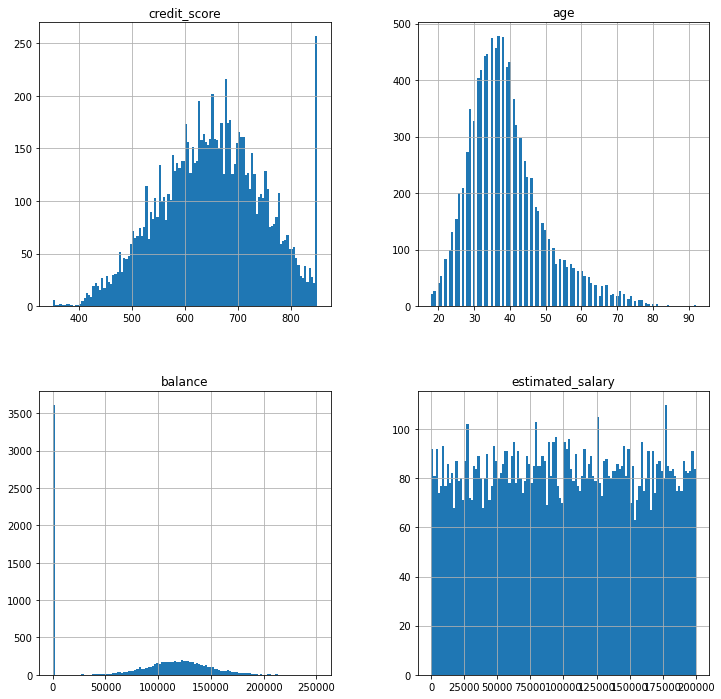

In [8]:
df.hist(column=['credit_score', 'age', 'balance', 'estimated_salary'], bins=120, figsize=(12, 12));

На графиках credit_score, age, balance наблюдаем нормальное распределение значений, соответственно нет дисбаланса данных представленом датафрейме. На графике credit_score, наблюдается высокий шпиль с записями чей кредитный рейтинг вышле 900.

График estimated_salary с данными о зарплате клиентов так же выглядит очень сбалансированным, присутствует большой разброс по заработной плате, при этом общее колличество клиентов для каждой группы соразмерно между собой.

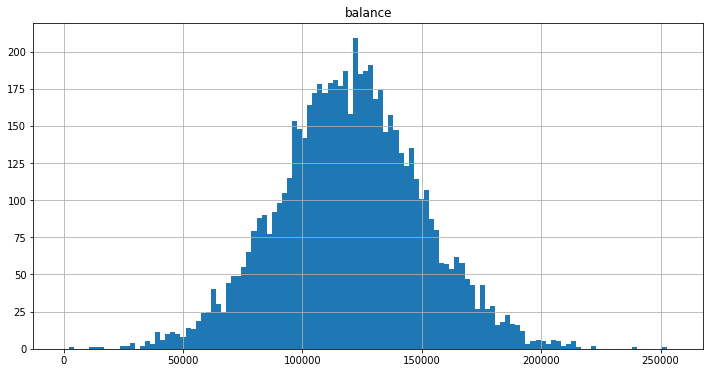

In [9]:
df.hist(column=['balance'], bins=120, figsize=(12, 6), range=(1, 255000));

График balance если отбросить нулевые балансы, при приблежении так же выглядит без сильных выбросов. Значения свыше 225000 не стоит считать выбросом, т.к. такие значения могут являться достоверными и модель при обучении должна иметь о них представление.

Так как значений в признаке tenure ограниченное количество, можно сделать его категориальным признаком. Пропуски можно считать как за отдельную категорию (заполнить значением -1). Затем заменим тип данных tenure на object и применить технику OHE.

In [10]:
df['tenure'] = df['tenure'].fillna(-1)
df['tenure'] = df['tenure'].astype(object)

Проверим степень корреляции между столбцами. Если обнаружатся сильно-скоррелированные (мультиколлинеарные признаки), стоит удалить по одному из пары, иначе они будут доминировать при обучении.

In [11]:
df.corr()

,row_number,customer_id,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
row_number,1.000000,0.004202,0.005840,0.000783,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
customer_id,0.004202,1.000000,0.005308,0.009497,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005840,0.005308,1.000000,-0.003965,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.000783,0.009497,-0.003965,1.000000,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
balance,-0.009067,-0.012419,0.006268,0.028308,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
num_of_products,0.007246,0.016972,0.012238,-0.030680,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
has_cr_card,0.000599,-0.014025,-0.005458,-0.011721,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
is_active_member,0.012044,0.001665,0.025651,0.085472,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.005988,0.015271,-0.001384,-0.007201,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.016571,-0.006248,-0.027094,0.285323,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


Разобьем датафрейм на признаки и целевой столбец. Целевой столбец - exited, где 0 - лояльный клиент, 1 - ушедший из банка. В признаки записываем все столбцы кроме целевого и не несущих полезной информации row_number, customer_id, surname.

In [12]:
features = df.drop(['exited', 'row_number', 'customer_id', 'surname'], axis=1)
target = df['exited']

features.head(10)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71
6,822,France,Male,50,7.0,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88
8,501,France,Male,44,4.0,142051.07,2,0,1,74940.50
9,684,France,Male,27,2.0,134603.88,1,1,1,71725.73


Общую выборку перед обучением модели требуется разбить на 3 части: обучающую, валидационную и тестовую выборки. Разбиваем на выборки в соотношении 60%/20%20%. Используем параметр stratify для того что бы равномерно заполнить выборки одинаковыми пропорциями классов из целевого признака.

In [13]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345, stratify=target_valid)

In [14]:
print('Размер обучающей выборки:', target_train.shape[0], 'Составляет', round(target_train.shape[0]/df.shape[0]*100, 2), '% от общей')
print('Размер валидационной выборки:', target_valid.shape[0], 'Составляет', round(target_valid.shape[0]/df.shape[0]*100, 2), '% от общей')
print('Размер тестовой выборки:', target_test.shape[0], 'Составляет', round(target_test.shape[0]/df.shape[0]*100, 2), '% от общей')

Размер обучающей выборки: 6000 Составляет 60.0 % от общей
Размер валидационной выборки: 2000 Составляет 20.0 % от общей
Размер тестовой выборки: 2000 Составляет 20.0 % от общей


Выведем первые 5 строк целевого столбца тестовой и валидационной выборки, что бы убедиться что они не пересекаются. И проверим распределение классов в целевых выборках

In [15]:
print('Соотношение классов в обучающей выборке:', target_train.value_counts()[0]/target_train.value_counts()[1])
print('Соотношение классов в валидационной выборке:', target_valid.value_counts()[0]/target_valid.value_counts()[1])
print('Соотношение классов в тестовой выборке:', target_test.value_counts()[0]/target_test.value_counts()[1])

Соотношение классов в обучающей выборке: 3.909983633387889
Соотношение классов в валидационной выборке: 3.9019607843137254
Соотношение классов в тестовой выборке: 3.914004914004914


In [16]:
display(target_valid.head())
display(target_test.head())

6612    0
519     0
1609    0
3475    0
2707    0
Name: exited, dtype: int64

657     0
2083    0
3234    1
1551    0
2344    1
Name: exited, dtype: int64

In [17]:
display(features_valid.head())
display(features_test.head())

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
6612,502,France,Female,64,3.0,139663.37,1,0,1,100995.11
519,707,France,Male,58,6.0,89685.92,1,0,1,126471.13
1609,619,France,Female,35,8.0,132292.63,1,1,0,65682.93
3475,769,France,Male,31,4.0,61297.05,2,1,1,7118.02
2707,637,France,Female,38,3.0,104339.56,1,0,0,119882.86


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary
657,601,Germany,Female,54,1.0,131039.97,2,1,1,199661.50
2083,534,France,Male,24,1.0,0.00,1,1,1,169653.32
3234,527,France,Male,47,1.0,0.00,1,1,0,21312.16
1551,730,Spain,Female,52,7.0,0.00,2,0,1,122398.84
2344,714,Germany,Female,49,4.0,93059.34,1,1,0,7571.51


In [18]:
features_train = features_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
features_valid = features_valid.reset_index(drop=True)
target_valid = target_valid.reset_index(drop=True)
features_test = features_test.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

Перекодируем в цифровые значения столбцы geography и gender, с помощью OneHotEncoder

In [19]:
ohe = OneHotEncoder(categories = 'auto',sparse = False, drop = 'first')
temp = ohe.fit_transform(features_train[['geography']])
ohe_column = pd.DataFrame(temp, columns = ["geography_1","geography_2"])
features_train = pd.concat([features_train, ohe_column],axis = 1)
display(features_train.head())
ohe = OneHotEncoder(categories = 'auto',sparse = False, drop = 'first')
temp = ohe.fit_transform(features_valid[['geography']])
ohe_column = pd.DataFrame(temp, columns = ["geography_1","geography_2"])
features_valid = pd.concat([features_valid, ohe_column],axis = 1)
display(features_train.head())
ohe = OneHotEncoder(categories = 'auto',sparse = False, drop = 'first')
temp = ohe.fit_transform(features_test[['geography']])
ohe_column = pd.DataFrame(temp, columns = ["geography_1","geography_2"])
features_test = pd.concat([features_test, ohe_column],axis = 1)
display(features_train.head())

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2
0,549,Germany,Female,49,6.0,124829.16,1,0,1,93551.36,1.0,0.0
1,694,France,Female,38,-1.0,195926.39,1,1,1,85522.84,0.0,0.0
2,660,France,Male,34,8.0,106486.66,2,0,1,182262.66,0.0,0.0
3,632,Germany,Female,41,-1.0,81877.38,1,1,1,33642.21,1.0,0.0
4,580,France,Female,56,1.0,131368.30,1,1,0,106918.67,0.0,0.0


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2
0,549,Germany,Female,49,6.0,124829.16,1,0,1,93551.36,1.0,0.0
1,694,France,Female,38,-1.0,195926.39,1,1,1,85522.84,0.0,0.0
2,660,France,Male,34,8.0,106486.66,2,0,1,182262.66,0.0,0.0
3,632,Germany,Female,41,-1.0,81877.38,1,1,1,33642.21,1.0,0.0
4,580,France,Female,56,1.0,131368.30,1,1,0,106918.67,0.0,0.0


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2
0,549,Germany,Female,49,6.0,124829.16,1,0,1,93551.36,1.0,0.0
1,694,France,Female,38,-1.0,195926.39,1,1,1,85522.84,0.0,0.0
2,660,France,Male,34,8.0,106486.66,2,0,1,182262.66,0.0,0.0
3,632,Germany,Female,41,-1.0,81877.38,1,1,1,33642.21,1.0,0.0
4,580,France,Female,56,1.0,131368.30,1,1,0,106918.67,0.0,0.0


In [20]:
temp = ohe.fit_transform(features_train[['gender']])
ohe_column = pd.DataFrame(temp, columns = ["gender_male"])
features_train = pd.concat([features_train, ohe_column],axis = 1)
display(features_train.head())
temp = ohe.fit_transform(features_valid[['gender']])
ohe_column = pd.DataFrame(temp, columns = ["gender_male"])
features_valid = pd.concat([features_valid, ohe_column],axis = 1)
display(features_valid.head())
temp = ohe.fit_transform(features_test[['gender']])
ohe_column = pd.DataFrame(temp, columns = ["gender_male"])
features_test = pd.concat([features_test, ohe_column],axis = 1)
display(features_test.head())

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2,gender_male
0,549,Germany,Female,49,6.0,124829.16,1,0,1,93551.36,1.0,0.0,0.0
1,694,France,Female,38,-1.0,195926.39,1,1,1,85522.84,0.0,0.0,0.0
2,660,France,Male,34,8.0,106486.66,2,0,1,182262.66,0.0,0.0,1.0
3,632,Germany,Female,41,-1.0,81877.38,1,1,1,33642.21,1.0,0.0,0.0
4,580,France,Female,56,1.0,131368.30,1,1,0,106918.67,0.0,0.0,0.0


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2,gender_male
0,502,France,Female,64,3.0,139663.37,1,0,1,100995.11,0.0,0.0,0.0
1,707,France,Male,58,6.0,89685.92,1,0,1,126471.13,0.0,0.0,1.0
2,619,France,Female,35,8.0,132292.63,1,1,0,65682.93,0.0,0.0,0.0
3,769,France,Male,31,4.0,61297.05,2,1,1,7118.02,0.0,0.0,1.0
4,637,France,Female,38,3.0,104339.56,1,0,0,119882.86,0.0,0.0,0.0


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2,gender_male
0,601,Germany,Female,54,1.0,131039.97,2,1,1,199661.50,1.0,0.0,0.0
1,534,France,Male,24,1.0,0.00,1,1,1,169653.32,0.0,0.0,1.0
2,527,France,Male,47,1.0,0.00,1,1,0,21312.16,0.0,0.0,1.0
3,730,Spain,Female,52,7.0,0.00,2,0,1,122398.84,0.0,1.0,0.0
4,714,Germany,Female,49,4.0,93059.34,1,1,0,7571.51,1.0,0.0,0.0


In [21]:
temp = ohe.fit_transform(features_train[['tenure']])
ohe_column = pd.DataFrame(temp, columns = ["tenure_1", "tenure_2", "tenure_3", "tenure_4", "tenure_5", "tenure_6", "tenure_7", "tenure_8", "tenure_9", "tenure_10", "tenure_11"])
features_train = pd.concat([features_train, ohe_column],axis = 1)
display(features_train.head())
temp = ohe.fit_transform(features_valid[['tenure']])
ohe_column = pd.DataFrame(temp, columns = ["tenure_1", "tenure_2", "tenure_3", "tenure_4", "tenure_5", "tenure_6", "tenure_7", "tenure_8", "tenure_9", "tenure_10", "tenure_11"])
features_valid = pd.concat([features_valid, ohe_column],axis = 1)
display(features_valid.head())
temp = ohe.fit_transform(features_test[['tenure']])
ohe_column = pd.DataFrame(temp, columns = ["tenure_1", "tenure_2", "tenure_3", "tenure_4", "tenure_5", "tenure_6", "tenure_7", "tenure_8", "tenure_9", "tenure_10", "tenure_11"])
features_test = pd.concat([features_test, ohe_column],axis = 1)
display(features_test.head())

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,...,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,tenure_11
0,549,Germany,Female,49,6.0,124829.16,1,0,1,93551.36,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,694,France,Female,38,-1.0,195926.39,1,1,1,85522.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,660,France,Male,34,8.0,106486.66,2,0,1,182262.66,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,632,Germany,Female,41,-1.0,81877.38,1,1,1,33642.21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,580,France,Female,56,1.0,131368.30,1,1,0,106918.67,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,...,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,tenure_11
0,502,France,Female,64,3.0,139663.37,1,0,1,100995.11,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,707,France,Male,58,6.0,89685.92,1,0,1,126471.13,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,619,France,Female,35,8.0,132292.63,1,1,0,65682.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,769,France,Male,31,4.0,61297.05,2,1,1,7118.02,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,637,France,Female,38,3.0,104339.56,1,0,0,119882.86,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,...,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,tenure_11
0,601,Germany,Female,54,1.0,131039.97,2,1,1,199661.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,534,France,Male,24,1.0,0.00,1,1,1,169653.32,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,527,France,Male,47,1.0,0.00,1,1,0,21312.16,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,730,Spain,Female,52,7.0,0.00,2,0,1,122398.84,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,714,Germany,Female,49,4.0,93059.34,1,1,0,7571.51,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Удалим из признаков перекодированные столбцы.

In [22]:
features_train = features_train.drop(['geography', 'gender', 'tenure'], axis=1)
features_train = features_train.astype('int')
features_valid = features_valid.drop(['geography', 'gender', 'tenure'], axis=1)
features_valid = features_valid.astype('int')
features_test = features_test.drop(['geography', 'gender', 'tenure'], axis=1)
features_test = features_test.astype('int')

Проведем маштабирование численных значений в столбцах, кроме булевых значений.

In [23]:
numeric = ['credit_score', 'age', 'balance', 'num_of_products', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])

scaler.fit(features_valid[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

scaler.fit(features_test[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [24]:
display(features_train.head())
display(features_valid.head())
display(features_test.head())

,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2,gender_male,...,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,tenure_11
0,-1.040434,0.953312,0.774662,-0.914708,0,1,-0.119108,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.454006,-0.095244,1.910545,-0.914708,1,1,-0.258665,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.103585,-0.476537,0.481604,0.820981,0,1,1.422833,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.184996,0.190726,0.088438,-0.914708,1,1,-1.160422,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.720933,1.620574,0.879132,-0.914708,1,0,0.113232,0,0,0,...,1,0,0,0,0,0,0,0,0,0


,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2,gender_male,...,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,tenure_11
0,-1.589494,2.384517,1.027029,-0.919729,0,1,0.049765,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0.554704,1.812679,0.216512,-0.919729,0,1,0.494637,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,-0.365732,-0.379367,0.907490,-0.919729,1,0,-0.566885,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.203193,-0.760592,-0.243869,0.781897,1,1,-1.589553,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,-0.177461,-0.093448,0.454163,-0.919729,0,0,0.379578,0,0,0,...,0,0,1,0,0,0,0,0,0,0


,credit_score,age,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_1,geography_2,gender_male,...,tenure_2,tenure_3,tenure_4,tenure_5,tenure_6,tenure_7,tenure_8,tenure_9,tenure_10,tenure_11
0,-0.495806,1.468331,0.863188,0.795143,1,1,1.710324,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-1.190343,-1.397823,-1.232626,-0.894853,1,1,1.189633,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,-1.262907,0.799561,-1.232626,-0.894853,1,0,-1.384340,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.841437,1.277254,-1.232626,0.795143,0,1,0.369677,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.675577,0.990638,0.255743,-0.894853,1,0,-1.622770,1,0,0,...,0,0,0,1,0,0,0,0,0,0


## Исследование задачи

Проверим соотношение классов в целевом признаке.

In [25]:
print('Процент записей лояльных клиентов класса 0 в обучающей выборке:', round(target_train.value_counts()[0]/target_train.shape[0]*100, 2))
print('Записей лояльных клиентов класса 0 в', round(target_train.value_counts()[0]/target_train.value_counts()[1], 1), 'больше класса 1')

Процент записей лояльных клиентов класса 0 в обучающей выборке: 79.63
Записей лояльных клиентов класса 0 в 3.9 больше класса 1


Проведем обучение на 3 моделях: DecisionTreeClassifier, RandomForest, LogisticRegression

### DecisionTreeClassifier

Обучим модель DecisionTreeClassifier с гиперпараметрами по умолчанию. Начальное состояние генератора случайных чисел зададим 12345. Для оценки обученной модели будет использовать оценку точности f1.

In [26]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.5078597339782346


Попробуем увеличить точность обучения изменяя гиперпараметры модели. Подберем максимальное количество фичей max_features, которые рассматриваются при выборе лучшего разбиения. 

Лучший гиперпараметр сохраняем в соответствующей переменной, что бы была возможность использовать его в дальнейшем. 

Модель обучения с лучшими показателями сохраняем в переменную tree_model.

In [27]:
max_score = 0
for max_features in ['auto', 'sqrt', 'log2']:
    model = DecisionTreeClassifier(random_state=12345, max_features=max_features)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_max_features = max_features
        max_score = current_score
        tree_model = model
print('Максимальное количество фичей:', best_max_features)
print('Точность обучения:', max_score)

Максимальное количество фичей: auto
Точность обучения: 0.4839506172839506


Подберем гиперпараметр глубины дерева.

In [28]:
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, max_features=best_max_features)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        max_depth = depth
        max_score = current_score
        tree_model = model
print('Максимальная глубина:', max_depth)
print('Точность обучения:', max_score)

Максимальная глубина: 9
Точность обучения: 0.5222381635581061


Подберем гиперпараметр миниального количества экземпляров, которое может содержаться в узле для его дальнейшего разбиения.

In [29]:
for min_samples_split in range(2, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, max_features=best_max_features, min_samples_split=min_samples_split)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_min_samples_split = min_samples_split
        max_score = current_score
        tree_model = model
print('Миниального количества экземпляров в узле :', best_min_samples_split)
print('Точность обучения:', max_score)

Миниального количества экземпляров в узле : 21
Точность обучения: 0.5562130177514792


Подберем миниальное количество экземпляров, которое может содержаться в листе.

In [30]:
for min_samples_leaf in range(1, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, max_features=best_max_features, 
                                   min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_min_samples_leaf = min_samples_leaf
        max_score = current_score
        tree_model = model
print('миниальное количество экземпляров в листе:', best_min_samples_leaf)
print('Точность обучения:', max_score)

миниальное количество экземпляров в листе: 2
Точность обучения: 0.5596465390279824


In [31]:
tree_model.fit(features_train, target_train)
predictions = tree_model.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.5596465390279824
AUC ROC обучения на валидационной выборке: 0.7074034387624397


Оценку F1 для модели DecisionTreeClassifier удалось поднять до 0.56, AUC ROC обучения на валидационной выборке состовляет 0.70

### RandomForestClassifier

Обучим модель RandomForestClassifier с гиперпараметрами по умолчанию. Начальное состояние генератора случайных чисел зададим 12345.

In [32]:
model = RandomForestClassifier(random_state=12345) 
model.fit(features_train, target_train) 
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.6024096385542168


Попробуем увеличить точность обучения изменяя гиперпараметры модели. Подберем колличество деревеьев в модели

Лучший гиперпараметр сохраняем в соответствующей переменной, что бы была возможность использовать его в дальнейшем.

Модель обучения с лучшими показателями сохраняем в переменную forest_model.

In [33]:
max_score = 0
for n_estimators in range(10, 200, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_n_estimators = n_estimators 
        max_score = current_score
        forest_model = model
print('Колличество деревьев:', best_n_estimators)
print('Точность обучения:', max_score)

Колличество деревьев: 120
Точность обучения: 0.6056971514242879


Подберем максимальную глубину дерева.

In [34]:
for max_depth in range(2, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=best_n_estimators, max_depth=max_depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_max_depth = max_depth 
        max_score = current_score
        forest_model = model
print('Максимальная глубина:', best_max_depth)
print('Точность обучения:', max_score)

Максимальная глубина: 19
Точность обучения: 0.6186186186186186


Подберем гиперпараметр миниального количества экземпляров, которое может содержаться в узле для его дальнейшего разбиения.

In [35]:
for min_samples_split in range(2, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=min_samples_split) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions) 
    if max_score < current_score:
        best_min_samples_split = min_samples_split 
        max_score = current_score
        forest_model = model
print('миниальное количество экземпляров в узле:', best_min_samples_split)
print('Точность обучения:', max_score)

миниальное количество экземпляров в узле: 3
Точность обучения: 0.6216216216216215


Подберем миниальное количество экземпляров, которое может содержаться в листе.

In [36]:
for min_samples_leaf in range(1, 50):
    model = RandomForestClassifier(
        random_state=12345, n_estimators=50, max_depth=8, min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf
    ) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions) 
    if max_score < current_score:
        best_min_samples_leaf = min_samples_leaf 
        max_score = current_score
        forest_model = model
print('Миниальное количество экземпляров в листе:', best_min_samples_leaf)
print('Точность обучения:', max_score)

Миниальное количество экземпляров в листе: 2
Точность обучения: 0.6216216216216215


In [37]:
forest_model.fit(features_train, target_train)
predictions = forest_model.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.6216216216216215
AUC ROC обучения на валидационной выборке: 0.7376588826485367


Оценку F1 для модели RandomForestClassifier удалось поднять до 0.62, AUC ROC обучения на валидационной выборке состовляет 0.73

### LogisticRegression

Обучим модель LogisticRegression с гиперпараметрами по умолчанию. Начальное состояние генератора случайных чисел зададим 12345.

In [38]:
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train) 
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.3157894736842105


Попробуем увеличить точность обучения изменяя гиперпараметры модели. Подберем алгоритм для использования в обучении.

Лучший гиперпараметр сохраняем в соответствующей переменной, что бы была возможность использовать его в дальнейшем.

Модель обучения с лучшими показателями сохраняем в переменную logistic_model.

In [39]:
max_score = 0
for solver in ['lbfgs', 'liblinear', 'sag', 'saga']:
    model = LogisticRegression(random_state=12345, solver=solver, max_iter=10000)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_solver = solver
        max_score = current_score
        logistic_model = model
print('Алгоритм для использования в обучении:', best_solver)
print('Точность обучения:', max_score)

Алгоритм для использования в обучении: lbfgs
Точность обучения: 0.3157894736842105


Подберем максимальное коллчисество итераций.

In [40]:
for max_iter in range(100, 10000, 100):
    model = LogisticRegression(random_state=12345, solver=best_solver, max_iter=max_iter)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_max_iter = max_iter
        max_score = current_score
        logistic_model = model
print('Размер максимального коллчисество итераций:', best_max_iter)
print('Точность обучения:', max_score)

Размер максимального коллчисество итераций: 9900
Точность обучения: 0.3157894736842105


Подберем штраф за неверную итерацию

In [41]:
for C in np.logspace(-4, 4, 10):
    model = LogisticRegression(random_state=12345, solver=best_solver, max_iter=best_max_iter, C=C)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        regularization_strength = C
        max_score = current_score
        logistic_model = model
print('Размер штрафа неверной итерации:', regularization_strength)
print('Точность обучения:', max_score)

Размер штрафа неверной итерации: 0.3593813663804626
Точность обучения: 0.31636363636363635


Подберем толерантность к критериям остановки.

In [42]:
for tol in np.logspace(-4, 4, 100):
    model = LogisticRegression(random_state=12345, solver=best_solver, C=regularization_strength, tol=tol)
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_tol = tol
        max_score = current_score
        logistic_model = model
print('Толерантность к критериям остановки:', best_tol)
print('Точность обучения:', max_score)

Толерантность к критериям остановки: 12.328467394420684
Точность обучения: 0.3194192377495463


In [43]:
logistic_model.fit(features_train, target_train)
predictions = logistic_model.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.3194192377495463
AUC ROC обучения на валидационной выборке: 0.5905692679081683


Оценку F1 для модели LogisticRegression составляет 0.32, AUC ROC обучения на валидационной выборке состовляет 0.59

Попробуем применить гиперпараметр веса класса в значении сбалансированный.

In [44]:
model = LogisticRegression(random_state=12345, solver=best_solver, C=regularization_strength, tol=best_tol, 
                           class_weight='balanced')
model.fit(features_train, target_train) 
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)
print('AUC ROC обучения:', roc_auc_score(target_valid, predictions))

Точность обучения: 0.5253054101221641
AUC ROC обучения: 0.7316238053010149


Оценка F1 сразу же поднялась до 0.52, а AUC ROC до 0.73

Из выбранных моделей обучения хорошо показал себя RandomForestClassifier, у данной модели самые высокие показатели F1 и AUC ROC.

DecisionTreeClassifier показал себя чуть хуже, но оценку F1 не удалось поднять до 0.59.

LogisticRegression без балансоровки классов показывает ужасные результаты, а с балансом F1 так же не достигает 0.59.

## Борьба с дисбалансом

Дисбаланс классов можно исправить двумя методами upsample и downsample. Либо дублируя меньший класс в выбокре, либо сокращая больший класс в выборке.

### upsample

Проведем балансировку классов в целевом признаке методом upsample. Записей лояльных клиентов класса 0 в 3.9 больше класса 1. Соответственно нужно увеличить колличество записей класса 1 в 4 раза.

In [45]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

Проверим баланс классов.

In [46]:
print('Изначальная обучающая выборка', features_train.shape[0], 'Выборка после upsample', features_upsampled.shape[0])
print('Записей класса 0:', target_upsampled.value_counts()[0], 'Записей класса 1:', target_upsampled.value_counts()[1])

Изначальная обучающая выборка 6000 Выборка после upsample 9666
Записей класса 0: 4778 Записей класса 1: 4888


Обучим те же модели с теми же гиперпараметрами и каждую модель запишем в новую переменную.

#### DecisionTreeClassifier

In [47]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.5091352009744214


In [48]:
max_score = 0
for max_features in ['auto', 'sqrt', 'log2']:
    model = DecisionTreeClassifier(random_state=12345, max_features=max_features)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_max_features = max_features
        max_score = current_score
        tree_model_upsampled = model
print('Максимальное количество фичей:', best_max_features)
print('Точность обучения:', max_score)

Максимальное количество фичей: auto
Точность обучения: 0.4820143884892086


In [49]:
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, max_features=best_max_features)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        max_depth = depth
        max_score = current_score
        tree_model_upsampled = model
print('Максимальная глубина:', max_depth)
print('Точность обучения:', max_score)

Максимальная глубина: 4
Точность обучения: 0.5539906103286384


In [50]:
for min_samples_split in range(2, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, max_features=best_max_features, min_samples_split=min_samples_split)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_min_samples_split = min_samples_split
        max_score = current_score
        tree_model_upsampled = model
print('Миниального количества экземпляров в узле :', best_min_samples_split)
print('Точность обучения:', max_score)

Миниального количества экземпляров в узле : 99
Точность обучения: 0.5539906103286384


In [51]:
for min_samples_leaf in range(1, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, max_features=best_max_features, 
                                   min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_min_samples_leaf = min_samples_leaf
        max_score = current_score
        tree_model_upsampled = model
print('миниальное количество экземпляров в листе:', best_min_samples_leaf)
print('Точность обучения:', max_score)

миниальное количество экземпляров в листе: 41
Точность обучения: 0.5539906103286384


In [52]:
tree_model_upsampled.fit(features_upsampled, target_upsampled)
predictions = tree_model_upsampled.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.5539906103286384
AUC ROC обучения на валидационной выборке: 0.7478261405064539


Оценку F1 для модели DecisionTreeClassifier удалось поднять до 0.55, AUC ROC обучения на валидационной выборке состовляет 0.74

#### RandomForestClassifier

In [53]:
model = RandomForestClassifier(random_state=12345) 
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.6122994652406417


In [54]:
max_score = 0
for n_estimators in range(10, 200, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators) 
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_n_estimators = n_estimators 
        max_score = current_score
        forest_model_upsamled = model
print('Колличество деревьев:', best_n_estimators)
print('Точность обучения:', max_score)

Колличество деревьев: 150
Точность обучения: 0.6248331108144192


In [55]:
for max_depth in range(2, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=best_n_estimators, max_depth=max_depth) 
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_max_depth = max_depth 
        max_score = current_score
        forest_model_upsamled = model
print('Максимальная глубина:', best_max_depth)
print('Точность обучения:', max_score)

Максимальная глубина: 11
Точность обучения: 0.6557017543859649


In [56]:
for min_samples_split in range(2, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=min_samples_split) 
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions) 
    if max_score < current_score:
        best_min_samples_split = min_samples_split 
        max_score = current_score
        forest_model_upsamled = model
print('миниальное количество экземпляров в узле:', best_min_samples_split)
print('Точность обучения:', max_score)

миниальное количество экземпляров в узле: 13
Точность обучения: 0.6587728740581271


In [57]:
for min_samples_leaf in range(1, 50):
    model = RandomForestClassifier(
        random_state=12345, n_estimators=50, max_depth=8, min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf
    ) 
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions) 
    if max_score < current_score:
        best_min_samples_leaf = min_samples_leaf 
        max_score = current_score
        forest_model_upsamled = model
print('Миниальное количество экземпляров в листе:', best_min_samples_leaf)
print('Точность обучения:', max_score)

Миниальное количество экземпляров в листе: 41
Точность обучения: 0.6587728740581271


In [58]:
forest_model_upsamled.fit(features_upsampled, target_upsampled)
predictions = forest_model_upsamled.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.6587728740581271
AUC ROC обучения на валидационной выборке: 0.8074748743718593


Оценку F1 для модели RandomForestClassifier удалось поднять до 0.65, AUC ROC обучения на валидационной выборке состовляет 0.80

#### LogisticRegression

In [59]:
model = LogisticRegression(random_state=12345)
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.5244215938303343


In [60]:
max_score = 0
for solver in ['lbfgs', 'liblinear', 'sag', 'saga']:
    model = LogisticRegression(random_state=12345, solver=solver, max_iter=10000)
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_solver = solver
        max_score = current_score
        logistic_model_upsampled = model
print('Алгоритм для использования в обучении:', best_solver)
print('Точность обучения:', max_score)

Алгоритм для использования в обучении: liblinear
Точность обучения: 0.5248713550600342


In [61]:
for max_iter in range(100, 10000, 100):
    model = LogisticRegression(random_state=12345, solver=best_solver, max_iter=max_iter)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_max_iter = max_iter
        max_score = current_score
        logistic_model_upsampled = model
print('Размер максимального коллчисество итераций:', best_max_iter)
print('Точность обучения:', max_score)

Размер максимального коллчисество итераций: 9900
Точность обучения: 0.5248713550600342


In [62]:
for C in np.logspace(-4, 4, 10):
    model = LogisticRegression(random_state=12345, solver=best_solver, max_iter=best_max_iter, C=C)
    model.fit(features_upsampled, target_upsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        regularization_strength = C
        max_score = current_score
        logistic_model_upsampled = model
print('Размер штрафа неверной итерации:', regularization_strength)
print('Точность обучения:', max_score)

Размер штрафа неверной итерации: 0.005994842503189409
Точность обучения: 0.5282685512367491


In [63]:
for tol in np.logspace(-4, 4, 100):
    model = LogisticRegression(random_state=12345, solver=best_solver, C=regularization_strength, tol=tol)
    model.fit(features_upsampled, target_upsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_tol = tol
        max_score = current_score
        logistic_model_upsampled = model
print('Толерантность к критериям остановки:', best_tol)
print('Точность обучения:', max_score)

Толерантность к критериям остановки: 1.9179102616724888
Точность обучения: 0.5286343612334803


In [64]:
logistic_model_upsampled.fit(features_upsampled, target_upsampled)
predictions = logistic_model_upsampled.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.5286343612334803
AUC ROC обучения на валидационной выборке: 0.7335390186225244


Оценку F1 для модели LogisticRegression удалось поднять до 0.52, AUC ROC обучения на валидационной выборке состовляет 0.73

Из выбранных моделей обучения хорошо показал себя RandomForestClassifier, у данной модели самые высокие показатели F1 и AUC ROC.

DecisionTreeClassifier показал себя чуть хуже, но оценку F1 все же неудалось поднять до 0.59.

LogisticRegression оценка F1 так же не достигает 0.59 и сотавляет 0.52.

### downsample

Проведем балансировку классов в целевом признаке методом upsample. Записей лояльных клиентов класса 0 в 3.9 больше класса 1. Соответственно нужно уменьшить колличество записей класса 0 в 4 раза.

In [65]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

Проверим баланс классов.

In [66]:
print('Изначальная обучающая выборка', features_train.shape[0], 'Выборка после downsample', features_downsampled.shape[0])
print('Записей класса 0:', target_downsampled.value_counts()[0], 'Записей класса 1:', target_downsampled.value_counts()[1])

Изначальная обучающая выборка 6000 Выборка после downsample 2416
Записей класса 0: 1194 Записей класса 1: 1222


Обучим те же модели с теми же гиперпараметрами и каждую модель запишем в новую переменную.

#### DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.5041876046901173


In [68]:
max_score = 0
for max_features in ['auto', 'sqrt', 'log2']:
    model = DecisionTreeClassifier(random_state=12345, max_features=max_features)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_max_features = max_features
        max_score = current_score
        tree_model_downsampled = model
print('Максимальное количество фичей:', best_max_features)
print('Точность обучения:', max_score)

Максимальное количество фичей: auto
Точность обучения: 0.4895572263993317


In [69]:
for depth in range(1, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, max_features=best_max_features)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        max_depth = depth
        max_score = current_score
        tree_model_downsampled = model
print('Максимальная глубина:', max_depth)
print('Точность обучения:', max_score)

Максимальная глубина: 4
Точность обучения: 0.552


In [70]:
for min_samples_split in range(2, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, max_features=best_max_features, min_samples_split=min_samples_split)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_min_samples_split = min_samples_split
        max_score = current_score
        tree_model_downsampled = model
print('Миниального количества экземпляров в узле :', best_min_samples_split)
print('Точность обучения:', max_score)

Миниального количества экземпляров в узле : 54
Точность обучения: 0.552


In [71]:
for min_samples_leaf in range(1, 100):
    model = DecisionTreeClassifier(random_state=12345, max_depth=max_depth, max_features=best_max_features, 
                                   min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_min_samples_leaf = min_samples_leaf
        max_score = current_score
        tree_model_downsampled = model
print('миниальное количество экземпляров в листе:', best_min_samples_leaf)
print('Точность обучения:', max_score)

миниальное количество экземпляров в листе: 27
Точность обучения: 0.555223880597015


In [72]:
tree_model_downsampled.fit(features_downsampled, target_downsampled)
predictions = tree_model_downsampled.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.555223880597015
AUC ROC обучения на валидационной выборке: 0.7420373928465859


Оценку F1 для модели DecisionTreeClassifier удалось поднять до 0.55, AUC ROC обучения на валидационной выборке состовляет 0.74

#### RandomForestClassifier

In [73]:
model = RandomForestClassifier(random_state=12345) 
model.fit(features_downsampled, target_downsampled) 
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.5908667287977633


In [74]:
max_score = 0
for n_estimators in range(10, 200, 10):
    model = RandomForestClassifier(random_state=12345, n_estimators=n_estimators) 
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_n_estimators = n_estimators 
        max_score = current_score
        forest_model_downsamled = model
print('Колличество деревьев:', best_n_estimators)
print('Точность обучения:', max_score)

Колличество деревьев: 50
Точность обучения: 0.6074766355140186


In [75]:
for max_depth in range(2, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=best_n_estimators, max_depth=max_depth) 
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_max_depth = max_depth 
        max_score = current_score
        forest_model_downsamled = model
print('Максимальная глубина:', best_max_depth)
print('Точность обучения:', max_score)

Максимальная глубина: 9
Точность обучения: 0.6258246936852025


In [76]:
for min_samples_split in range(2, 50):
    model = RandomForestClassifier(random_state=12345, n_estimators=best_n_estimators, max_depth=best_max_depth, min_samples_split=min_samples_split) 
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions) 
    if max_score < current_score:
        best_min_samples_split = min_samples_split 
        max_score = current_score
        forest_model_downsamled = model
print('миниальное количество экземпляров в узле:', best_min_samples_split)
print('Точность обучения:', max_score)

миниальное количество экземпляров в узле: 54
Точность обучения: 0.6258246936852025


In [77]:
for min_samples_leaf in range(1, 50):
    model = RandomForestClassifier(
        random_state=12345, n_estimators=50, max_depth=8, min_samples_split=best_min_samples_split, min_samples_leaf=min_samples_leaf
    ) 
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions) 
    if max_score < current_score:
        best_min_samples_leaf = min_samples_leaf 
        max_score = current_score
        forest_model_downsamled = model
print('Миниальное количество экземпляров в листе:', best_min_samples_leaf)
print('Точность обучения:', max_score)

Миниальное количество экземпляров в листе: 27
Точность обучения: 0.6258246936852025


In [78]:
forest_model_downsamled.fit(features_downsampled, target_downsampled)
predictions = forest_model_downsamled.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.6258246936852025
AUC ROC обучения на валидационной выборке: 0.8060461621834664


Оценку F1 для модели RandomForestClassifier удалось поднять до 0.62, AUC ROC обучения на валидационной выборке состовляет 0.80

#### LogisticRegression

In [79]:
model = LogisticRegression(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predictions = model.predict(features_valid)
current_score = f1_score(target_valid, predictions)
print('Точность обучения:', current_score)

Точность обучения: 0.5212224108658743


In [80]:
max_score = 0
for solver in ['lbfgs', 'liblinear', 'sag', 'saga']:
    model = LogisticRegression(random_state=12345, solver=solver, max_iter=10000)
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score < current_score:
        best_solver = solver
        max_score = current_score
        logistic_model_downsampled = model
print('Алгоритм для использования в обучении:', best_solver)
print('Точность обучения:', max_score)

Алгоритм для использования в обучении: liblinear
Точность обучения: 0.5216652506372133


In [81]:
for max_iter in range(100, 10000, 100):
    model = LogisticRegression(random_state=12345, solver=best_solver, max_iter=max_iter)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_max_iter = max_iter
        max_score = current_score
        logistic_model_downsampled = model
print('Размер максимального коллчисество итераций:', best_max_iter)
print('Точность обучения:', max_score)

Размер максимального коллчисество итераций: 9900
Точность обучения: 0.5216652506372133


In [82]:
for C in np.logspace(-4, 4, 10):
    model = LogisticRegression(random_state=12345, solver=best_solver, max_iter=best_max_iter, C=C)
    model.fit(features_downsampled, target_downsampled)
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        regularization_strength = C
        max_score = current_score
        logistic_model_downsampled = model
print('Размер штрафа неверной итерации:', regularization_strength)
print('Точность обучения:', max_score)

Размер штрафа неверной итерации: 0.046415888336127774
Точность обучения: 0.5284974093264249


In [83]:
for tol in np.logspace(-4, 4, 100):
    model = LogisticRegression(random_state=12345, solver=best_solver, C=regularization_strength, tol=tol)
    model.fit(features_downsampled, target_downsampled) 
    predictions = model.predict(features_valid)
    current_score = f1_score(target_valid, predictions)
    if max_score <= current_score:
        best_tol = tol
        max_score = current_score
        logistic_model_downsampled = model
print('Толерантность к критериям остановки:', best_tol)
print('Точность обучения:', max_score)

Толерантность к критериям остановки: 0.0011233240329780276
Точность обучения: 0.5284974093264249


In [84]:
logistic_model_downsampled.fit(features_downsampled, target_downsampled)
predictions = logistic_model_downsampled.predict(features_valid)
print('F1 на валидационной выборке:', f1_score(target_valid, predictions))
print('AUC ROC обучения на валидационной выборке:', roc_auc_score(target_valid, predictions))

F1 на валидационной выборке: 0.5284974093264249
AUC ROC обучения на валидационной выборке: 0.7355527638190956


Оценку F1 для модели LogisticRegression удалось поднять до 0.52, AUC ROC обучения на валидационной выборке состовляет 0.73

Из выбранных моделей обучения хорошо показал себя RandomForestClassifier, у данной модели самые высокие показатели F1 и AUC ROC.

DecisionTreeClassifier показал себя чуть хуже, но оценку F1 не удалось поднять до 0.59.

LogisticRegression оценка F1 так же не достигает 0.59 и сотавляет 0.52.

## Тестирование модели

### upsampled

Проведем тестирование моделей после балансировки методом upsampled

In [85]:
tree_model_upsampled.fit(features_upsampled, target_upsampled)
predictions = tree_model_upsampled.predict(features_test)
print('F1 на тестовой выборке:', f1_score(target_test, predictions), 
      'на валидационной выборке:', f1_score(target_valid, tree_model_upsampled.predict(features_valid)))
print('AUC ROC на тестовой выборке:', roc_auc_score(target_test, predictions), 
      'на валидационной выборке:', roc_auc_score(target_valid, logistic_model_downsampled.predict(features_valid)))

F1 на тестовой выборке: 0.5205479452054795 на валидационной выборке: 0.5539906103286384
AUC ROC на тестовой выборке: 0.7172395816463611 на валидационной выборке: 0.7355527638190956


In [86]:
forest_model_upsamled.fit(features_upsampled, target_upsampled)
predictions = forest_model_upsamled.predict(features_test)
print('F1 на тестовой выборке:', f1_score(target_test, predictions), 
      'на валидационной выборке:', f1_score(target_valid, forest_model_upsamled.predict(features_valid)))
print('AUC ROC на тестовой выборке:', roc_auc_score(target_test, predictions), 
      'на валидационной выборке:', roc_auc_score(target_valid, logistic_model_downsampled.predict(features_valid)))

F1 на тестовой выборке: 0.6105032822757112 на валидационной выборке: 0.6587728740581271
AUC ROC на тестовой выборке: 0.7711887542396018 на валидационной выборке: 0.7355527638190956


In [87]:
logistic_model_upsampled.fit(features_upsampled, target_upsampled)
predictions = logistic_model_upsampled.predict(features_test)
print('F1 на тестовой выборке:', f1_score(target_test, predictions), 
      'на валидационной выборке:', f1_score(target_valid, logistic_model_upsampled.predict(features_valid)))
print('AUC ROC на тестовой выборке:', roc_auc_score(target_test, predictions), 
      'на валидационной выборке:', roc_auc_score(target_valid, logistic_model_downsampled.predict(features_valid)))

F1 на тестовой выборке: 0.4738197424892704 на валидационной выборке: 0.5286343612334803
AUC ROC на тестовой выборке: 0.6877794589658996 на валидационной выборке: 0.7355527638190956


### downsampled

In [88]:
tree_model_downsampled.fit(features_downsampled, target_downsampled)
predictions = tree_model_downsampled.predict(features_test)
print('F1 на тестовой выборке:', f1_score(target_test, predictions), 
      'на валидационной выборке:', f1_score(target_valid, tree_model_downsampled.predict(features_valid)))
print('AUC ROC на тестовой выборке:', roc_auc_score(target_test, predictions), 
      'на валидационной выборке:', roc_auc_score(target_valid, logistic_model_downsampled.predict(features_valid)))

F1 на тестовой выборке: 0.5239085239085239 на валидационной выборке: 0.555223880597015
AUC ROC на тестовой выборке: 0.714478731427884 на валидационной выборке: 0.7355527638190956


In [89]:
forest_model_downsamled.fit(features_downsampled, target_downsampled)
predictions = forest_model_downsamled.predict(features_test)
print('F1 на тестовой выборке:', f1_score(target_test, predictions), 
      'на валидационной выборке:', f1_score(target_valid, forest_model_downsamled.predict(features_valid)))
print('AUC ROC на тестовой выборке:', roc_auc_score(target_test, predictions), 
      'на валидационной выборке:', roc_auc_score(target_valid, logistic_model_downsampled.predict(features_valid)))

F1 на тестовой выборке: 0.5833333333333334 на валидационной выборке: 0.6258246936852025
AUC ROC на тестовой выборке: 0.7713476188052459 на валидационной выборке: 0.7355527638190956


In [90]:
logistic_model_downsampled.fit(features_downsampled, target_downsampled)
predictions = logistic_model_downsampled.predict(features_test)
print('F1 на тестовой выборке:', f1_score(target_test, predictions), 
      'на валидационной выборке:', f1_score(target_valid, logistic_model_downsampled.predict(features_valid)))
print('AUC ROC на тестовой выборке:', roc_auc_score(target_test, predictions), 
      'на валидационной выборке:', roc_auc_score(target_valid, logistic_model_downsampled.predict(features_valid)))

F1 на тестовой выборке: 0.4761904761904762 на валидационной выборке: 0.5284974093264249
AUC ROC на тестовой выборке: 0.6904963515133006 на валидационной выборке: 0.7355527638190956


## Вывод

В данном исследовании было проведено обучение 3 моделей DecisionTreeClassifier, RandomForestClassifier и LogisticRegression.

Баланс классов в целевом признаке смещен в отношении 1 к 4 относительно клиентов которые ушли из банка и лояльных клиентов.

Обозначенные модели прошли обучение без балансировки классов и с двумя методами балансировки(upsample и downsaple)

Хорошо себя показала модель обучения RandomForestClassifier. Оценка F1 на обучении без баланса классови с обеими балансировками превысила порог 0.59 при этом оценка AUC ROC так же превышала 0.75 и показывала лучшие показатели чем на остальных моделях обучения.

Метод downsaple в данном исследовании оказался менее эфективен, чем upsample. 

Модели обучения DecisionTreeClassifier и LogisticRegression при обоих методах балансировки и без балансировки классов не достигли порога оценки F1 в 0.59

В дальнейшем стоит использовать модель RandomForestClassifier с методом балансировки upsample. На тестовой выборке эта модель показывает F1 в 0.61